In [19]:
# Importing Libraries 

import os
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported.")

Libraries imported.


In [20]:
# Configuration and Setup 

ASSETS_DIRECTORY = "C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 2/MLP"
print(f"The assets are in {ASSETS_DIRECTORY}")

The assets are in C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 2/MLP


In [21]:
# Loading Model
model = load_model(os.path.join(ASSETS_DIRECTORY, 'mlp_model_dataset2.keras'))
print("Model loaded")

Model loaded


In [22]:
#Loading validation data
SPLIT_DIR = os.path.join(ASSETS_DIR, 'split_dataset')  # Subfolder containing the CSVs

# Load validation data
X_data_df = pd.read_csv(os.path.join(SPLIT_DIR, 'X_val.csv'), index_col=0)
y_data_s = pd.read_csv(os.path.join(SPLIT_DIR, 'y_val.csv'), index_col=0).squeeze("columns")

# Set the index name
X_data_df.index.name = 'patient_id'
y_data_s.index.name = 'patient_id'

print(f"Data set loaded successfully. Found {X_data_df.shape[0]} patients.")

Data set loaded successfully. Found 2310 patients.


In [23]:
print("\nVerifying the index name:")
print(y_data_s.index) 


Verifying the index name:
Index([1727117804,  666763011, 1733528773, 1444491791, 1727591567, 1822238526,
        374358815,  658541712, 1532086888,  135244920,
       ...
        292410316, 2785923502,  301611152, 1038549386, 1438438457,  579620020,
        855795319,  679444009,  382311138,  300242285],
      dtype='int64', name='patient_id', length=2310)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
--- MODEL PERFORMANCE ON Validation Set - Dataset 2 - MLP ---
Accuracy:    0.9775
Precision:   0.9750
Recall:      0.9801 (Sensitivity)
F1-Score:    0.9775
Specificity: 0.9749
AUC-ROC:     0.9988
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1155
           1       0.98      0.98      0.98      1155

    accuracy                           0.98      2310
   macro avg       0.98      0.98      0.98      2310
weighted avg       0.98      0.98      0.98      2310

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


--- Confusion Matrix ---


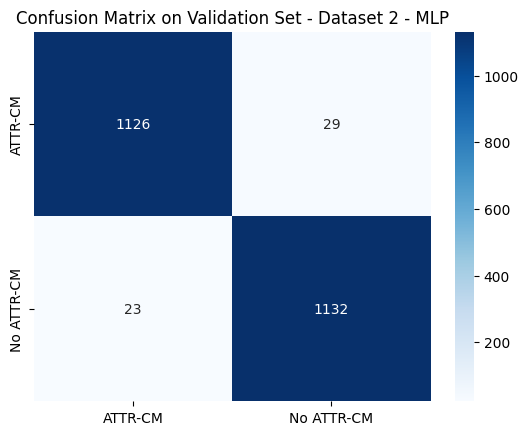

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


AUC-ROC Curve


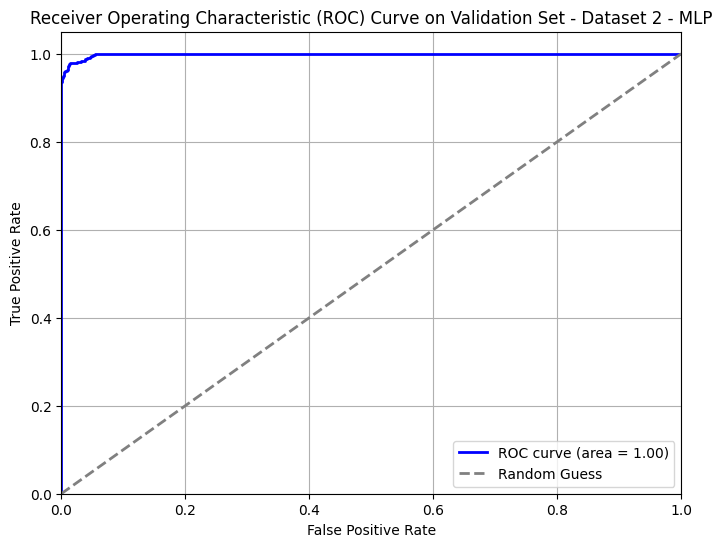

In [25]:
# Defining Evaluation Function ---
def evaluate_model(y_true, y_pred_proba, set_name="Validation Set - Dataset 2 - MLP"):
    """
    Calculates, prints, and plots a comprehensive set of evaluation metrics.
    """
    # Convert probabilities to binary predictions using a 0.5 threshold
    y_pred_binary = (y_pred_proba > 0.5).astype(int)

    # --- Calculate Metrics ---
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary, zero_division=0)
    recall = recall_score(y_true, y_pred_binary, zero_division=0)
    f1 = f1_score(y_true, y_pred_binary, zero_division=0)
    auc_roc = roc_auc_score(y_true, y_pred_proba)
    
    # Calculate Specificity from the confusion matrix
    try:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    except ValueError: # This handles cases where only one class is predicted
        specificity = 0.0
        
    # --- Print Metrics Report ---
    print(f"--- MODEL PERFORMANCE ON {set_name} ---")
    print(f"Accuracy:    {accuracy:.4f}")
    print(f"Precision:   {precision:.4f}")
    print(f"Recall:      {recall:.4f} (Sensitivity)")
    print(f"F1-Score:    {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"AUC-ROC:     {auc_roc:.4f}")
    print("--------------------------------------------------")
    print("--------------------------------------------------")
    print("--------------------------------------------------\n")
    
    print("\nClassification Report")
    print(classification_report(y_true, y_pred_binary, zero_division=0))
    print("--------------------------------------------------")
    print("--------------------------------------------------")
    print("--------------------------------------------------\n")

    # --- Plot Confusion Matrix ---
    print("\n--- Confusion Matrix ---")
    conf_matrix = confusion_matrix(y_true, y_pred_binary)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['ATTR-CM', 'No ATTR-CM'],  # predicted labels
                yticklabels=['ATTR-CM', 'No ATTR-CM'])  # actual labels
    plt.title(f'Confusion Matrix on {set_name}')
    plt.show()

    # --- Plot AUC-ROC Curve ---
    print("--------------------------------------------------")
    print("--------------------------------------------------")
    print("--------------------------------------------------\n")
    print("\nAUC-ROC Curve")
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve on {set_name}')
    plt.legend(loc="lower right"); plt.grid(True); plt.show()

# --- Make Predictions using the loaded model and data ---
# The model expects a NumPy array, so we use .values on our DataFrame
predictions_proba = model.predict(X_data_df.values).flatten()
predictions_binary = (predictions_proba > 0.5).astype(int)

# --- Run Evaluation on Validation Set ---
# We use y_data_s, which is the pandas Series of true labels
evaluate_model(y_data_s, predictions_proba, set_name="Validation Set - Dataset 2 - MLP")

In [26]:
# --- Create and Save the Predictions Report ---
print("\n--- Creating and Saving Validation Predictions Report ---")

# Create the report DataFrame. Using y_data_s directly preserves the patient_id index.
validation_report_df = pd.DataFrame({
    'true_label': y_data_s,
    'predicted_probability': predictions_proba,
    'predicted_label': predictions_binary
})
# Reset the index to turn the 'patient_id' index into a column
validation_report_df = validation_report_df.reset_index()

# Define the output path
VALIDATION_PREDICTIONS_PATH = os.path.join(ASSETS_DIR, 'validation_predictions.csv')
validation_report_df.to_csv(VALIDATION_PREDICTIONS_PATH, index=False)
print(f"Validation predictions report saved to: {VALIDATION_PREDICTIONS_PATH}")


# --- Display a Sample of the Final Predictions File ---
print("\n--- Sample of Final Predictions File ---")
print(validation_report_df.head())



--- Creating and Saving Validation Predictions Report ---
Validation predictions report saved to: C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 2\MLP\validation_predictions.csv

--- Sample of Final Predictions File ---
   patient_id  true_label  predicted_probability  predicted_label
0  1727117804           0           2.778077e-08                0
1   666763011           1           9.999361e-01                1
2  1733528773           1           9.999992e-01                1
3  1444491791           1           9.986857e-01                1
4  1727591567           0           7.076140e-07                0
